# Dependence between variables 

1. Correlation and regression
1. Linear regression -- OLS


# 1. Correlation and Regression

* Pearson’s coefficient measures linear correlation (r).
* Spearman coefficient compares the 'ranks' of data. 
* NumPy, SciPy, and Pandas all have functions that can be used to calculate these coefficients.

# Correlation in Numpy (Pearson's r)

Required packages


In [1]:
import numpy as np
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Let's make up some numbers


In [2]:
mu, sigma = 0, 0.1 # mean and standard deviation
x = np.random.normal(mu, sigma, 50)
y = np.random.normal(mu, sigma, 50)
z = np.random.normal(mu, sigma, 50)

What does our data look like?


<AxesSubplot:>

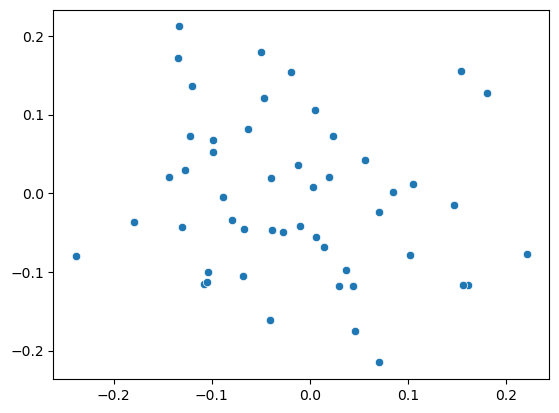

In [3]:
sns.scatterplot(x=x, y=y)

Use Numpy to get pearson's correlation between `x` and `y`

In [4]:
np.corrcoef(x, y)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


array([[ 1.       , -0.1670228],
       [-0.1670228,  1.       ]])

### The result is a correlation matrix. Each cell in the table shows the correlation between two variables.

* The values on the main diagonal of the correlation matrix (upper left and lower right) are equal to 1. These corresponds to the correlation coefficient for `x` and `x` and `y` and `y`, so they will always be equal to 1.

* The values on the bottom left and top right show the pearson's correlation coefficient for `x` and `y`.




We can do the same thing with more than two variables


In [5]:
np.corrcoef([x, y, z])

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


array([[ 1.        , -0.1670228 , -0.00433136],
       [-0.1670228 ,  1.        , -0.08698186],
       [-0.00433136, -0.08698186,  1.        ]])

# Correlation in SciPy (Pearson and Spearman)

Import required packages


In [6]:
import scipy.stats

In [7]:
# pearson
scipy.stats.pearsonr(x, y)

PearsonRResult(statistic=-0.16702280086146315, pvalue=0.24632436157700877)

In [8]:
# spearman
scipy.stats.spearmanr(x, y)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


SignificanceResult(statistic=-0.2204561824729892, pvalue=0.12394375224677459)

#### Note: these functions return both the correlation coefficient and the p-value

# Correlation in Pandas

### Time for some real data :)

### Today's dataset: Birthweight

This dataset contains information on new born babies and their parents. 

https://www.sheffield.ac.uk/mash/statistics/datasets

Required packages


In [9]:
import pandas as pd

In [10]:
# import dataset
file = "./birthweight.csv"
df = pd.read_csv(file)

In [11]:
df.head()

,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


### Is there any correlation between birthweight and head circumfrence?

<AxesSubplot:xlabel='Birthweight', ylabel='Headcirc'>

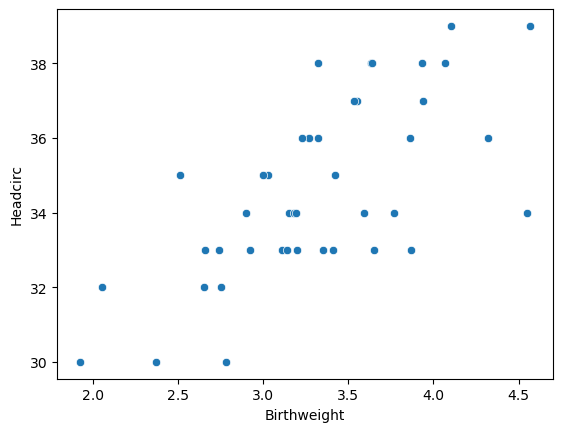

In [12]:
# First, let's visualize the data
sns.scatterplot(x=df.Birthweight, y=df.Headcirc)

In [13]:
df.Birthweight.corr(df.Headcirc)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


0.6846156184774088

### There are lots of ways to calculate correlation in Pandas...

In [14]:
df.Birthweight.corr(df.Headcirc,
                    method='pearson')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


0.6846156184774088

In [15]:
df.Birthweight.corr(df.Headcirc,
                    method='spearman')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


0.6772599775176383

### We can also find the correlation between all the variables in our dataframe at once

In [16]:
pearsoncorr = df.corr(method ='pearson')
pearsoncorr

,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
Length,1.000000,0.726833,0.563172,0.705111,-1.534062e-01,0.075268,-0.039843,0.484992,3.981974e-01,0.137184,0.079485,0.008800,0.208358,-0.609928,0.130502
Birthweight,0.726833,1.000000,0.684616,0.708303,-3.142339e-01,0.000173,-0.152335,0.363055,4.008856e-01,0.175710,0.071045,-0.093136,0.031022,-0.651964,-0.108947
Headcirc,0.563172,0.684616,1.000000,0.404635,-1.828719e-01,0.145842,-0.132988,0.337047,3.028541e-01,0.301151,0.123892,-0.046837,0.041509,-0.446849,0.055386
Gestation,0.705111,0.708303,0.404635,1.000000,-9.474608e-02,0.010778,0.043195,0.210503,2.550824e-01,0.142175,0.130987,-0.113831,0.207597,-0.602935,0.007395
smoker,-0.153406,-0.314234,-0.182872,-0.094746,1.000000e+00,0.212479,0.727218,0.000353,1.006136e-15,0.197501,-0.014891,0.417633,0.110633,0.253012,0.146938
mage,0.075268,0.000173,0.145842,0.010778,2.124788e-01,1.000000,0.340294,0.059956,2.741677e-01,0.806584,0.441683,0.090927,-0.199547,-0.076394,0.692664
mnocig,-0.039843,-0.152335,-0.132988,0.043195,7.272181e-01,0.340294,1.000000,0.126439,1.489446e-01,0.248425,0.198526,0.257307,0.020672,0.035384,0.290574
mheight,0.484992,0.363055,0.337047,0.210503,3.532676e-04,0.059956,0.126439,1.000000,6.806217e-01,-0.079870,0.035297,0.048398,0.274338,-0.198151,0.116002
mppwt,0.398197,0.400886,0.302854,0.255082,1.006136e-15,0.274168,0.148945,0.680622,1.000000e+00,0.255706,0.180374,0.057163,0.092983,-0.353974,0.136853
fage,0.137184,0.175710,0.301151,0.142175,1.975014e-01,0.806584,0.248425,-0.079870,2.557058e-01,1.000000,0.300471,0.135862,-0.269377,-0.245095,0.351405


### That isn't so helpful... we can also make a heatmap to display the data visually

<AxesSubplot:>

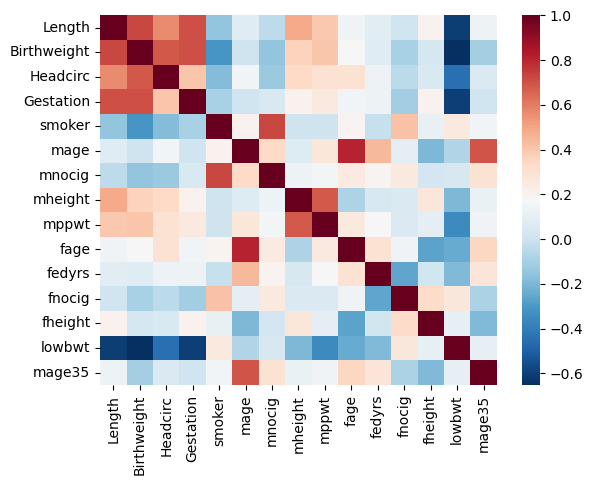

In [17]:
sns.heatmap(pearsoncorr,
           cmap='RdBu_r')

# Linear Regression 

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).

https://en.wikipedia.org/wiki/Linear_regression

We have a lot of options for for studying linear regression

### Scipy.stats

In [18]:
result = scipy.stats.linregress(df.Birthweight,
                                df.Headcirc)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [19]:
print(result)

LinregressResult(slope=2.7205639282363485, intercept=25.58239845298082, rvalue=0.6846156184774087, pvalue=5.734797978444235e-07, stderr=0.45798646115832664, intercept_stderr=1.5416553949208143)


A reminder of what the data look like...

<AxesSubplot:xlabel='Birthweight', ylabel='Headcirc'>

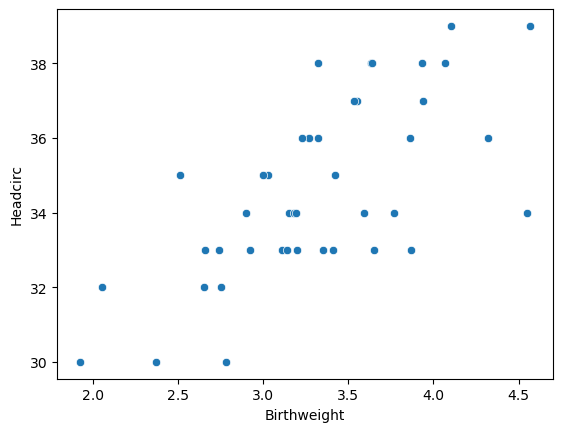

In [20]:
sns.scatterplot(x=df.Birthweight, y=df.Headcirc)

In [21]:
result.slope

2.7205639282363485

In [22]:
result.intercept

25.58239845298082

### Using sklearn

In [23]:
from sklearn import linear_model

In [24]:
my_model = linear_model.LinearRegression()
results = my_model.fit(df[['Birthweight']], df[['Headcirc']])
print("The linear model is: Y = {:.5} + {:.5}X".format(results.intercept_[0],
                                                       results.coef_[0][0]))

The linear model is: Y = 25.582 + 2.7206X


In [25]:
# the results are the same, but the sklearn package has some other features
predictions = results.predict(df[['Birthweight']])

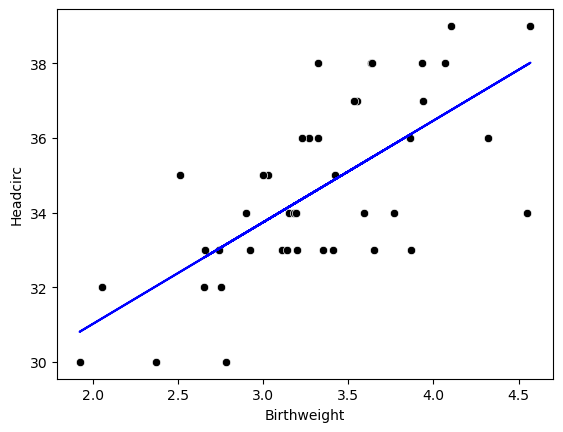

In [27]:
# we can add the predicted values to the original plot
ax = sns.scatterplot(x=df.Birthweight, 
                     y=df.Headcirc,
                     color="0.0")
ax.plot(df['Birthweight'],
        predictions,
        color="b")

# Hypothesis testing

* Null hypothesis 1: The actual intercept is equal to zero
* Null hypothesis 2: The actual slope is equal to zero

Using the `statsmodels.api` package

In [29]:
import statsmodels.api as sm

Set up the model

In [31]:
X = sm.add_constant(df.Birthweight)
Y = df.Headcirc
model = sm.OLS(Y, X)  # OLS = ordinary least squares
results = model.fit()
print(results.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:               Headcirc   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     35.29
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           5.73e-07
Time:                        12:14:37   Log-Likelihood:                -82.574
No. Observations:                  42   AIC:                             169.1
Df Residuals:                      40   BIC:                             172.6
Df Model:                           1                                         
Covariance Type:            nonrobust  

#### The P-value is the answer to the question "how likely is it that we’d get a test statistic t* as extreme as we did if the null hypothesis were true?

Does this output correspond to a one-tailed or two-tailed test?

If we want to test whether the slope is different from 0, we need a two-sided test.

If we want to test a specific direction, we can use a one-sided test. To do this, we need to divide the p-value in the table above in half.

Read more: https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/  

#### Can we compute the P-value using permutations?.... YES!